In [1]:
import torch
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
rnd = np.random.rand(10, 5).astype(np.float32)

In [33]:
t_rnd = torch.from_numpy(rnd)
tf_rnd = tf.convert_to_tensor(rnd)

In [34]:
t_rnd

tensor([[0.2792, 0.4178, 0.2661, 0.5997, 0.0517],
        [0.0992, 0.2769, 0.3031, 0.2003, 0.9395],
        [0.8153, 0.6504, 0.7908, 0.2229, 0.4764],
        [0.7972, 0.2787, 0.3248, 0.0987, 0.7286],
        [0.6712, 0.9852, 0.0334, 0.0646, 0.3195],
        [0.4752, 0.9439, 0.3338, 0.8561, 0.5229],
        [0.5014, 0.5073, 0.4126, 0.4416, 0.0097],
        [0.2595, 0.8416, 0.8042, 0.9717, 0.4311],
        [0.0551, 0.1550, 0.3219, 0.3202, 0.5504],
        [0.3171, 0.5886, 0.3972, 0.6851, 0.3303]])

In [35]:
t_norm = torch.nn.BatchNorm1d(5)
tf_norm = tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-05)
tf_norm.build(tf_rnd.shape)

In [36]:
t_norm.__dict__

{'training': True, '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([1., 1., 1., 1., 1.], requires_grad=True)),
              ('bias', Parameter containing:
               tensor([0., 0., 0., 0., 0.], requires_grad=True))]), '_buffers': OrderedDict([('running_mean',
               tensor([0., 0., 0., 0., 0.])),
              ('running_var', tensor([1., 1., 1., 1., 1.])),
              ('num_batches_tracked',
               tensor(0))]), '_backward_hooks': OrderedDict(), '_forward_hooks': OrderedDict(), '_forward_pre_hooks': OrderedDict(), '_state_dict_hooks': OrderedDict(), '_load_state_dict_pre_hooks': OrderedDict(), '_modules': OrderedDict(), 'num_features': 5, 'eps': 1e-05, 'momentum': 0.1, 'affine': True, 'track_running_stats': True}

In [37]:
tf_norm.__dict__

{'_self_setattr_tracking': True,
 '_stateful': False,
 '_input_spec': InputSpec(ndim=2, axes={1: 5}),
 '_supports_ragged_inputs': False,
 '_name': 'batch_normalization_4',
 '_activity_regularizer': None,
 '_trainable_weights': [<tf.Variable 'gamma:0' shape=(5,) dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>,
  <tf.Variable 'beta:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>],
 '_non_trainable_weights': [<tf.Variable 'moving_mean:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
  <tf.Variable 'moving_variance:0' shape=(5,) dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>],
 '_updates': [],
 '_thread_local': <_thread._local at 0x14d3f5cb0>,
 '_callable_losses': [],
 '_losses': [],
 '_metrics': [],
 '_dtype_policy': <Policy "float32", loss_scale=None>,
 '_dtype_defaulted_to_floatx': True,
 '_autocast': True,
 '_layers': [ListWrapper([1])],
 '_inbound_nodes': [],
 '_outbound_nodes': [],
 '_exp

In [38]:
t_norm

BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [39]:
t_norm.forward(t_rnd)

tensor([[-0.5742, -0.5314, -0.5968,  0.5071, -1.4367],
        [-1.2731, -1.0414, -0.4304, -0.8113,  1.8819],
        [ 1.5077,  0.3108,  1.7632, -0.7367,  0.1510],
        [ 1.4374, -1.0350, -0.3330, -1.1468,  1.0936],
        [ 0.9481,  1.5233, -1.6438, -1.2596, -0.4355],
        [ 0.1871,  1.3737, -0.2922,  1.3537,  0.3249],
        [ 0.2887, -0.2073,  0.0620, -0.0149, -1.5936],
        [-0.6504,  1.0031,  1.8238,  1.7352, -0.0182],
        [-1.4444, -1.4831, -0.3457, -0.4157,  0.4276],
        [-0.4269,  0.0873, -0.0070,  0.7891, -0.3952]],
       grad_fn=<NativeBatchNormBackward>)

In [41]:
t_norm.__dict__

{'training': True, '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([1., 1., 1., 1., 1.], requires_grad=True)),
              ('bias', Parameter containing:
               tensor([0., 0., 0., 0., 0.], requires_grad=True))]), '_buffers': OrderedDict([('running_mean',
               tensor([0.0427, 0.0565, 0.0399, 0.0446, 0.0436])),
              ('running_var',
               tensor([0.9074, 0.9085, 0.9055, 0.9102, 0.9080])),
              ('num_batches_tracked',
               tensor(1))]), '_backward_hooks': OrderedDict(), '_forward_hooks': OrderedDict(), '_forward_pre_hooks': OrderedDict(), '_state_dict_hooks': OrderedDict(), '_load_state_dict_pre_hooks': OrderedDict(), '_modules': OrderedDict(), 'num_features': 5, 'eps': 1e-05, 'momentum': 0.1, 'affine': True, 'track_running_stats': True}

In [46]:
tf_norm(tf_rnd, training=True)

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[-0.5742347 , -0.5314337 , -0.5968071 ,  0.5070759 , -1.4366573 ],
       [-1.273102  , -1.0413741 , -0.43039656, -0.811309  ,  1.8819484 ],
       [ 1.5076603 ,  0.3108456 ,  1.7631763 , -0.7367292 ,  0.15103185],
       [ 1.4373921 , -1.0350107 , -0.33303213, -1.1467812 ,  1.0936044 ],
       [ 0.9481088 ,  1.5233321 , -1.6437594 , -1.2596334 , -0.43546844],
       [ 0.1871134 ,  1.3737059 , -0.2922411 ,  1.3536824 ,  0.3248645 ],
       [ 0.28874278, -0.20732903,  0.06197679, -0.01494253, -1.5936046 ],
       [-0.65044487,  1.0030923 ,  1.8237594 ,  1.735185  , -0.01819205],
       [-1.4443842 , -1.4830825 , -0.3457141 , -0.41565502,  0.4276389 ],
       [-0.42685068,  0.08725429, -0.00696063,  0.78910816, -0.39516616]],
      dtype=float32)>

In [50]:
t_norm.running_mean

tensor([0.0427, 0.0565, 0.0399, 0.0446, 0.0436])

In [48]:
tf_norm.moving_mean

<tf.Variable 'moving_mean:0' shape=(5,) dtype=float32, numpy=
array([0.04270545, 0.05645385, 0.0398795 , 0.04460875, 0.04359961],
      dtype=float32)>

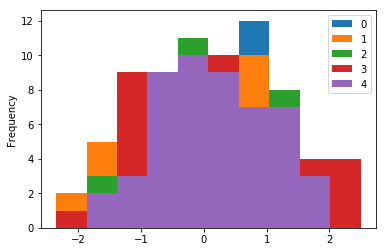

In [7]:
pd.DataFrame(tf.random.normal([50, 5]).numpy()).plot(kind='hist')

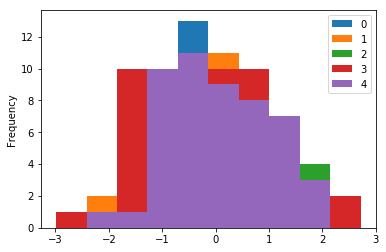

In [8]:
mean = torch.zeros(50,5)
std = mean + 1
pd.DataFrame(torch.normal(mean, std).numpy()).plot(kind='hist')

In [9]:
relu = tf.keras.layers.ReLU()

In [13]:
x = tf.convert_to_tensor([-1.0, 10.0, 20.0])
with tf.GradientTape() as t:
    t.watch(x)
    y = relu(x)
   
grad = t.gradient(y, x)

In [14]:
grad

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 1.], dtype=float32)>

In [50]:
def act(x):
    y = tf.convert_to_tensor([x[0][0]*10, x[0][1]-1, x[0][2]])
    return y

In [51]:
class TestModel(tf.keras.Model):
    def __init__(self):
        super(TestModel, self).__init__()

        self.model = [tf.keras.layers.Dense(3), tf.keras.layers.ReLU()]

    def call(self, x, **kwargs):
        for layer in self.model:
            x = layer(x, **kwargs)
        return x
model = TestModel()

In [52]:
x = tf.convert_to_tensor([[-1.0, 10.0, 20.0]])
with tf.GradientTape() as t:
    y = act(model(x))
   
grad = t.gradient(y, model.trainable_variables)

In [49]:
grad

[<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[-1.,  0.,  0.],
        [10.,  0.,  0.],
        [20.,  0.,  0.]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 0., 0.], dtype=float32)>]

In [53]:
grad

[<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 0.,  0., -1.],
        [ 0.,  0., 10.],
        [ 0.,  0., 20.]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 1.], dtype=float32)>]